Importing necessary libraries and packages

In [94]:
import numbers as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [96]:
df = pd.read_csv("dataset\Breast_Cancer.csv")

In [97]:
# First 5 rows of the dataset
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [98]:
# Last 5 rows of the dataset
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [99]:
# checking the num of rows and columns
df.shape

(4024, 16)

In [100]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

---

## Column Descriptions

1. **Age**  
   The age of the patient at the time of diagnosis.

2. **Race**  
   The racial/ethnic background of the patient.

3. **Marital Status**  
   The marital status of the patient (e.g., single, married, divorced).

4. **T Stage**  
   The size and extent of the primary tumor. "T" stands for "Tumor" in the TNM staging system.
   T1, T2, T3, T4: Refers to the size and/or extent of the main tumor. The higher the number after the T, the larger the tumor or the more it has grown into nearby tissues. T's may be further divided to provide more detail, such as T3a and T3b.

5. **N Stage**  
   The extent of spread to nearby lymph nodes. "N" stands for "Nodes" in the TNM staging system.
   N1, N2, N3: Refers to the number and location of lymph nodes that contain cancer. The higher the number after the N, the more lymph nodes that contain cancer.

6. **6th Stage**  
   The overall stage of cancer based on the 6th edition of the TNM staging guidelines, combining T, N, and M (Metastasis) categories.

7. **Differentiate**  
   The degree of tumor differentiation, indicating how much tumor cells differ from normal cells. Common values include:
   - Well-differentiated (low grade)
   - Moderately differentiated
   - Poorly differentiated (high grade)

8. **Grade**  
   The grade of the tumor, describing how abnormal the cancer cells look under a microscope and how quickly the tumor is likely to grow and spread.

9. **A Stage**  
   The stage of cancer defined by a specific classification system.

10. **Tumor Size**  
    The size of the tumor measured in millimeters (or other unit).

11. **Estrogen Status**  
    Indicates whether the tumor is estrogen receptor-positive (ER+) or estrogen receptor-negative (ER-). This shows if estrogen hormones fuel tumor growth.

12. **Progesterone Status**  
    Indicates whether the tumor is progesterone receptor-positive (PR+) or progesterone receptor-negative (PR-). This shows if progesterone hormones fuel tumor growth.

13. **Regional Node Examined**  
    The number of regional lymph nodes examined during surgery or treatment.

14. **Regional Node Positive**  
    The number of regional lymph nodes found to contain cancer.

15. **Survival Months**  
    The number of months the patient survived after diagnosis.

16. **Status**  
    The survival status of the patient (e.g., Alive or Dead).

---

In [101]:
# Checking for null values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [102]:
# geting the list of column names
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Plotting Bar graphs

In [103]:
def bar_chart(feature):
    survived = df[df['Status'] == 'Alive'][feature].value_counts()
    dead = df[df['Status'] == 'Dead'][feature].value_counts()
    data = pd.DataFrame([survived, dead])
    data.index = ['Alive', 'Dead']
    data.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

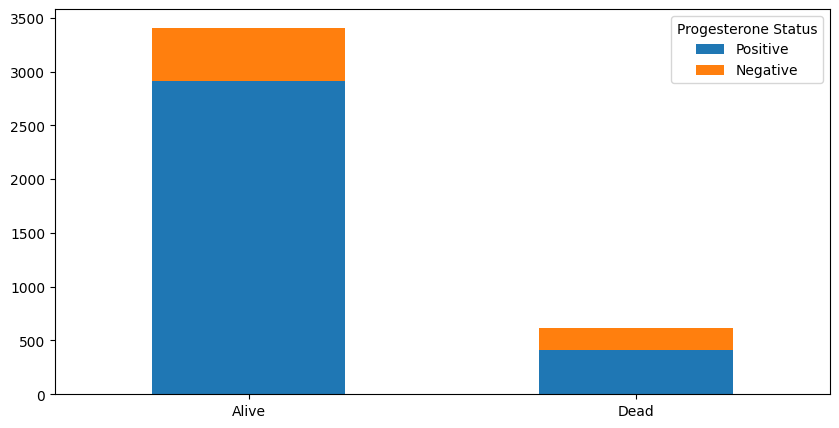

In [104]:
bar_chart('Progesterone Status')

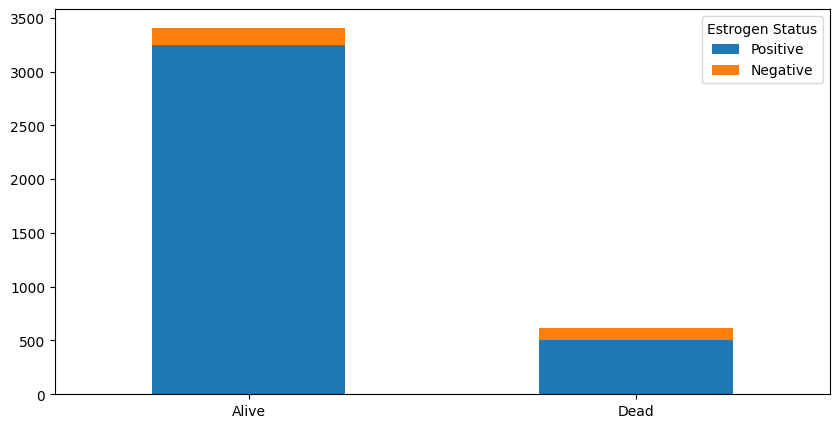

In [105]:
bar_chart('Estrogen Status')

In [106]:
# Reformating column 'T Stage '
df['T Stage']=df['T Stage ']

In [107]:
# Removing original column after renaming
df.drop(columns='T Stage ', inplace=True)

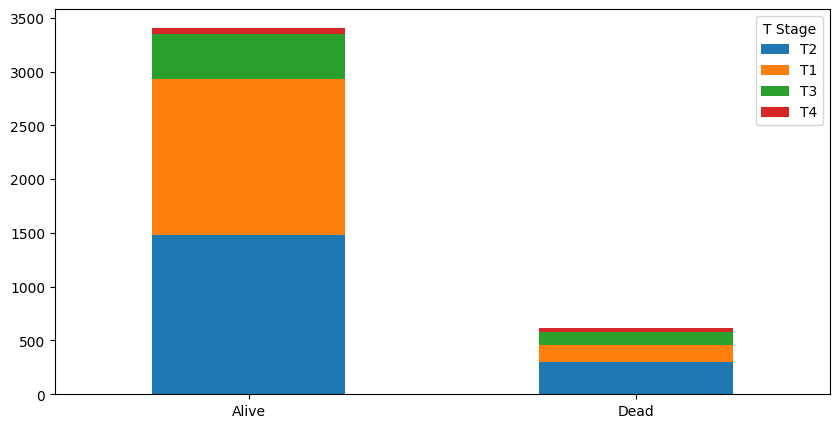

In [108]:
bar_chart('T Stage')

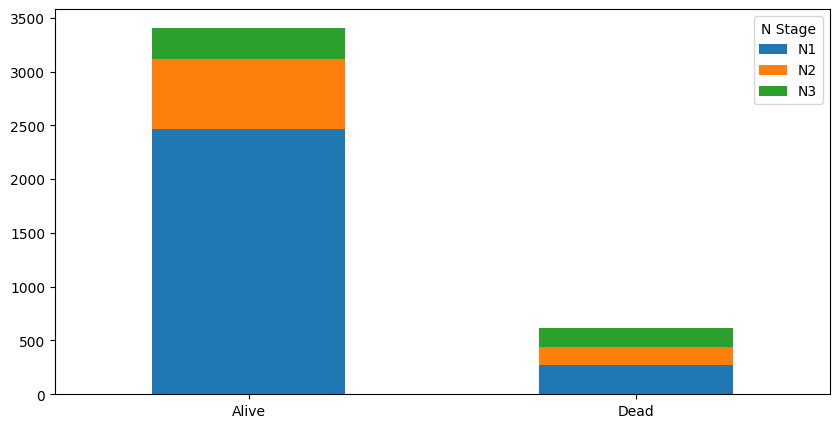

In [109]:
bar_chart('N Stage')

<Axes: xlabel='Status', ylabel='count'>

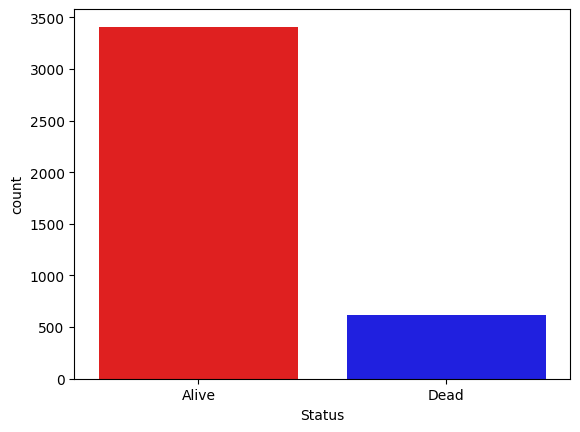

In [110]:
sns.countplot(x='Status', data=df, palette=['r','b'])

Checking unique values of columns

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   N Stage                 4024 non-null   object
 4   6th Stage               4024 non-null   object
 5   differentiate           4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
 15  T St

In [112]:
df['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [113]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [114]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [115]:
df['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [116]:
df['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [117]:
df['Grade'] = df['Grade'].replace(['1','2','3',' anaplastic; Grade IV'],[1,2,3,4])

In [118]:
df['Grade'].unique()

array([3, 2, 1, 4])

In [119]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [120]:
df['differentiate'] = df['differentiate'].replace(['Poorly differentiated','Moderately differentiated', 
                                                 'Well differentiated',], ['Poorly', 'Moderately', 'Well'])

In [121]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,Positive,Positive,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,Positive,Positive,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,Positive,Positive,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,Positive,Positive,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,Positive,Positive,3,1,50,Alive,T2


Encoding Categorical Features

In [122]:
la = LabelEncoder()
df['Progesterone Status'] = la.fit_transform(df['Progesterone Status'])
df['Estrogen Status'] = la.fit_transform(df['Estrogen Status'])

In [123]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,Alive,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,Alive,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,Alive,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,Alive,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,Alive,T2


In [124]:
# encoding status
df['Status'] = df['Status'].replace(['Alive', 'Dead'], [1,0])

In [125]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,1,T1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,1,T2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,1,T3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,1,T1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,1,T2


In [126]:
df['T Stage']

0       T1
1       T2
2       T3
3       T1
4       T2
        ..
4019    T1
4020    T2
4021    T2
4022    T2
4023    T2
Name: T Stage, Length: 4024, dtype: object

In [127]:
df['T Stage'].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [128]:
# Encoding T Status
df['T Stage'] = df['T Stage'].replace(['T1', 'T2', 'T3', 'T4'], [1, 2, 3, 4])

In [129]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,4,1,1,24,1,60,1,1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,35,1,1,14,5,62,1,2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,63,1,1,14,7,75,1,3
3,58,White,Married,N1,IIA,Poorly,3,Regional,18,1,1,2,1,84,1,1
4,47,White,Married,N1,IIB,Poorly,3,Regional,41,1,1,3,1,50,1,2


In [130]:
st = StandardScaler()
df['Survival Months'] = st.fit_transform(df['Survival Months'].values.reshape(-1,1))
df['Tumor Size'] = st.fit_transform(df['Tumor Size'].values.reshape(-1, 1))
df['Regional Node Examined'] = st.fit_transform(df['Regional Node Examined'].values.reshape(-1, 1))

In [131]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,68,White,Married,N1,IIA,Poorly,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,50,White,Married,N2,IIIA,Moderately,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,58,White,Divorced,N3,IIIC,Moderately,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,58,White,Married,N1,IIA,Poorly,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,47,White,Married,N1,IIB,Poorly,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [132]:
df['Age'] = la.fit_transform(df['Age'])

In [133]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,N1,IIA,Poorly,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,N2,IIIA,Moderately,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,N3,IIIC,Moderately,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,N1,IIA,Poorly,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,N1,IIB,Poorly,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [134]:
df['differentiate'].unique()

array(['Poorly', 'Moderately', 'Well', 'Undifferentiated'], dtype=object)

In [135]:
df['differentiate'] = df['differentiate'].replace(['Poorly','Moderately', 'Well','Undifferentiated'], [1, 2, 3, 4])

In [136]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,N1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,N2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,N3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,N1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,N1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [137]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [138]:
df['N Stage'] = df['N Stage'].replace(['N1','N2', 'N3'], [1, 2, 3])

In [139]:
df.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage
0,38,White,Married,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1
1,20,White,Married,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2
2,28,White,Divorced,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3
3,28,White,Married,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1
4,17,White,Married,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2


In [140]:
# One-Hot Encoding for 'Race' and 'Marital Status'
df = pd.get_dummies(df, columns=['Race', 'Marital Status'], drop_first=True)

In [141]:
df.head()

,Age,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,38,1,IIA,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1,False,True,True,False,False,False
1,20,2,IIIA,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2,False,True,True,False,False,False
2,28,3,IIIC,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3,False,True,False,False,False,False
3,28,1,IIA,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1,False,True,True,False,False,False
4,17,1,IIB,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2,False,True,True,False,False,False


In [142]:
df['6th Stage'] = la.fit_transform(df['6th Stage'])

In [143]:
df.head()

,Age,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,38,1,0,1,3,Regional,-1.253661,1,1,1.190676,1,-0.492961,1,1,False,True,True,False,False,False
1,20,2,2,2,2,Regional,0.214345,1,1,-0.044095,5,-0.405695,1,2,False,True,True,False,False,False
2,28,3,4,2,2,Regional,1.540287,1,1,-0.044095,7,0.161530,1,3,False,True,False,False,False,False
3,28,1,0,1,3,Regional,-0.590691,1,1,-1.525820,1,0.554224,1,1,False,True,True,False,False,False
4,17,1,1,1,3,Regional,0.498475,1,1,-1.402343,1,-0.929288,1,2,False,True,True,False,False,False


In [144]:
df['A Stage'] = la.fit_transform(df['A Stage'])

In [145]:
df.head()

,Age,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,38,1,0,1,3,1,-1.253661,1,1,1.190676,1,-0.492961,1,1,False,True,True,False,False,False
1,20,2,2,2,2,1,0.214345,1,1,-0.044095,5,-0.405695,1,2,False,True,True,False,False,False
2,28,3,4,2,2,1,1.540287,1,1,-0.044095,7,0.161530,1,3,False,True,False,False,False,False
3,28,1,0,1,3,1,-0.590691,1,1,-1.525820,1,0.554224,1,1,False,True,True,False,False,False
4,17,1,1,1,3,1,0.498475,1,1,-1.402343,1,-0.929288,1,2,False,True,True,False,False,False


Plotting Corelation Heatmap

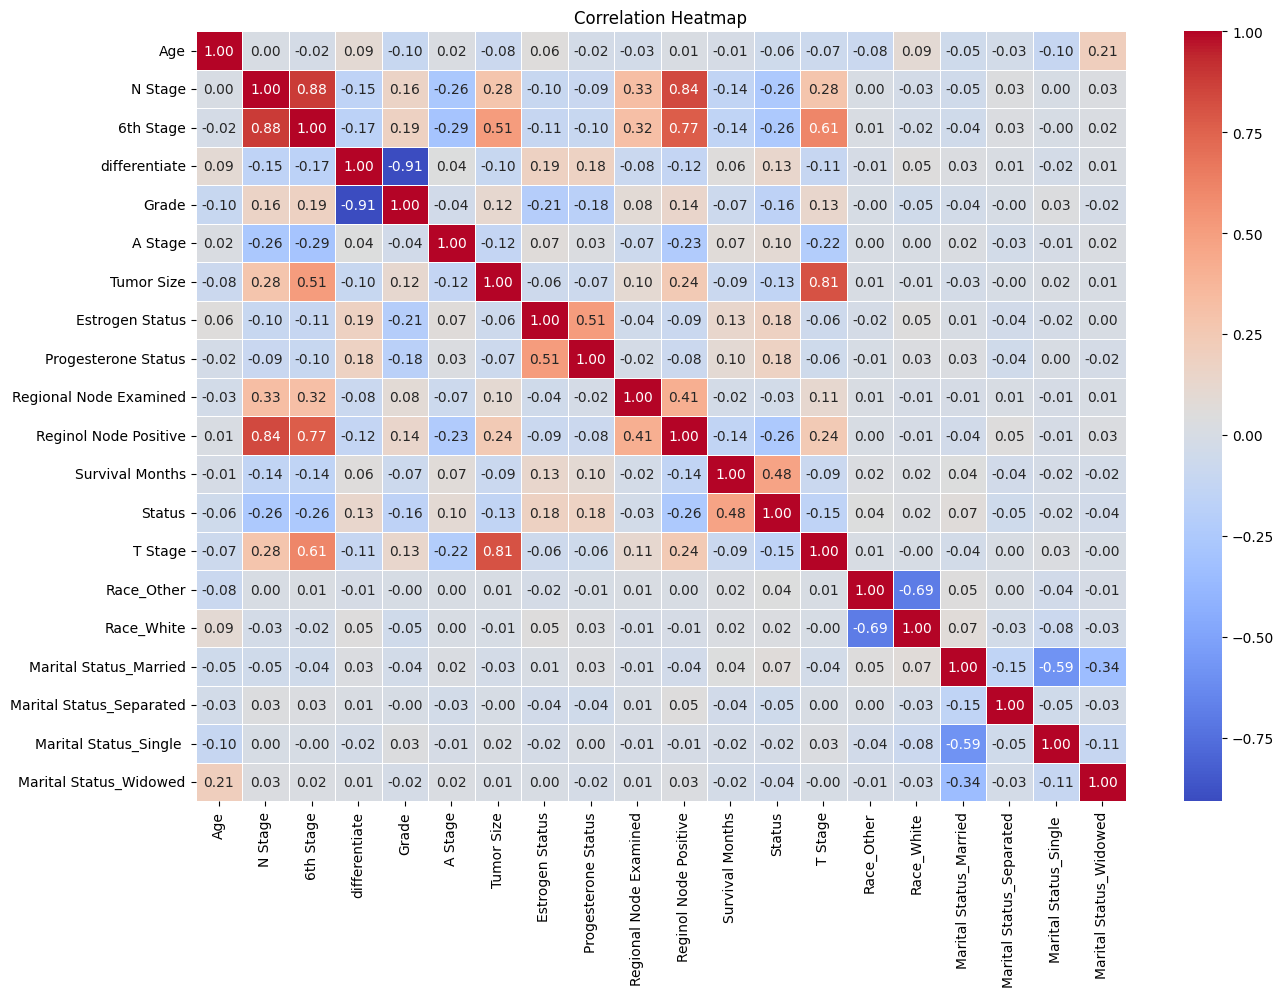

In [146]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

K-Fold Cross Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=40)

In [62]:
# Seperating the dataset for train and test
x = df.drop('Status',axis=1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [63]:
from sklearn.metrics import classification_report

In [64]:
# Can be used to train, validate and generate classification reports
def all(model):
    model.fit(x_train,y_train.astype(int))
    pre = model.predict(x_test)
    print(confusion_matrix(pre, y_test.astype(int)))
    print(classification_report(pre, y_test.astype(int)))
    print('score_test = ', model.score(x_test, y_test.astype(int))*100)
    print('score_train = ', model.score(x_train, y_train.astype(int))*100)

Training Multiple models one after another

In [65]:
model_1 = RandomForestClassifier(n_estimators=200, max_depth=50)
all(model_1)

[[ 233   53]
 [ 260 2674]]
              precision    recall  f1-score   support

           0       0.47      0.81      0.60       286
           1       0.98      0.91      0.94      2934

    accuracy                           0.90      3220
   macro avg       0.73      0.86      0.77      3220
weighted avg       0.94      0.90      0.91      3220

score_test =  90.27950310559007
score_train =  100.0


In [66]:
model_2 = GradientBoostingClassifier()
all(model_2)

[[ 245   75]
 [ 248 2652]]
              precision    recall  f1-score   support

           0       0.50      0.77      0.60       320
           1       0.97      0.91      0.94      2900

    accuracy                           0.90      3220
   macro avg       0.73      0.84      0.77      3220
weighted avg       0.93      0.90      0.91      3220

score_test =  89.96894409937887
score_train =  94.15422885572139


In [67]:
model_3 = AdaBoostClassifier()
all(model_3)

[[ 246  100]
 [ 247 2627]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59       346
           1       0.96      0.91      0.94      2874

    accuracy                           0.89      3220
   macro avg       0.73      0.81      0.76      3220
weighted avg       0.91      0.89      0.90      3220

score_test =  89.22360248447205
score_train =  90.67164179104478


In [70]:
model_4 = XGBClassifier()
all(model_4)

[[ 246  114]
 [ 247 2613]]
              precision    recall  f1-score   support

           0       0.50      0.68      0.58       360
           1       0.96      0.91      0.94      2860

    accuracy                           0.89      3220
   macro avg       0.73      0.80      0.76      3220
weighted avg       0.91      0.89      0.90      3220

score_test =  88.7888198757764
score_train =  100.0


Creating Ensemble Model

In [71]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42 ,max_depth=4  , max_features=6)
clf2 = XGBClassifier(max_depth = 4 , learning_rate = 0.02 ,  n_estimators= 50, random_state=42 , max_features= 6 )
clf3 = GradientBoostingClassifier(n_estimators= 50, learning_rate=0.03, random_state=42 ,max_depth=3  , max_features=6 )
clf4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.03)

In [72]:
# Combing predictions from multiple classifiers
v_clf = VotingClassifier(estimators=[("RandomForest" , clf1) , ('XGB' , clf2) ,
                                     ("GradientBoosting" , clf3) ,("AdaBoost" , clf4)] , voting = "soft")

In [73]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(max_depth=4,
                                                     max_features=6,
                                                     random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma...
                                            max_features=6, max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_features=6,
                                                         n_estimators=50,
                                                         random_state=42)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=0.03,
                                                 n_estimators=100))],
                 voting='soft')

Ensemble model evaluation

In [74]:
y_pred = v_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[ 201  292]
 [  33 2694]]
89.90683229813664


In [75]:
v_clf.score(x_test , y_test)

0.8990683229813664

In [76]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 89.90683229813664
[[ 201  292]
 [  33 2694]]
True Positive: 2694
True Negative: 201
False Positive: 292
False Negative: 33
precision_score1: 0.9022103148024112
precision_score2: 0.9022103148024112
recall_score: 0.9878987898789879
recall_score: 0.9878987898789879


In [77]:
import joblib

# Save the model
joblib.dump(v_clf, 'ensemble_model.pkl')


['ensemble_model.pkl']